# Lab 3 supplementary - Linear Regression and Linear Discriminant Analysis from scratch
This notebook looks at implementing linear regression and LDA from scratch. Please use it to augment your understanding of the notes.

## Linear Regression
This task will load the example data from y_values.npy and x_values.npy and fit a linear regression model to the data. We plot the development of the model training in each step. The following subtasks are:
1. Plot the data.
2. Select a number of iterations.
3. Selection a learning rate.
4. Plot the initial model prediction.
5. Calculate the predicted y values.
6. Update w0.
7. Update w1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(10, 1)


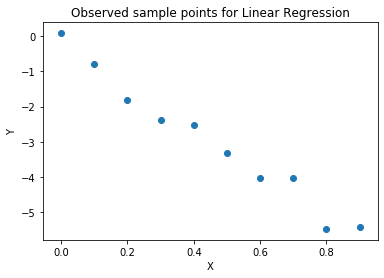

In [63]:
y = np.load('y_values.npy')
x = np.load('x_values.npy')

print(y.shape)
#y = np.squeeze(y)
#x = np.squeeze(x)

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Observed sample points for Linear Regression')
plt.show(block=False)

### Linear Regression Algorithm:

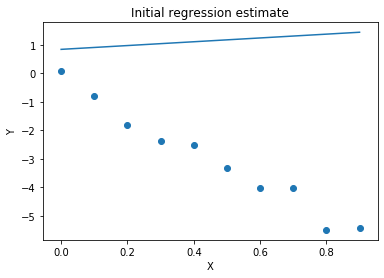

-> Iter: 0, Update w0: -0.532, Update w1: -1.209, MSE: 4.85883


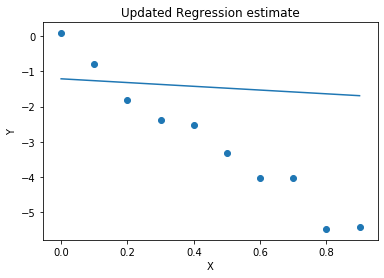

-> Iter: 50, Update w0: -5.155, Update w1: -0.672, MSE: 0.14565


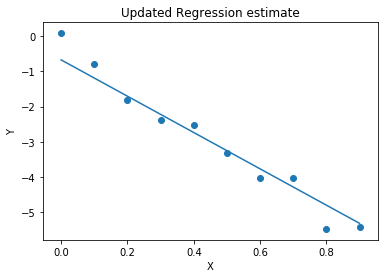

-> Iter: 100, Update w0: -5.862, Update w1: -0.331, MSE: 0.08586


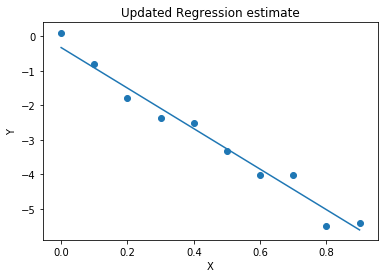

-> Iter: 150, Update w0: -5.988, Update w1: -0.270, MSE: 0.08395


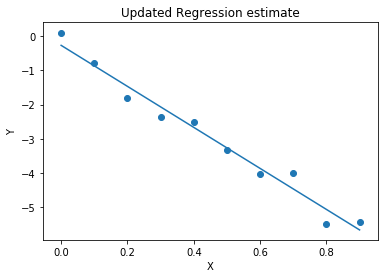

-> Iter: 200, Update w0: -6.010, Update w1: -0.260, MSE: 0.08389


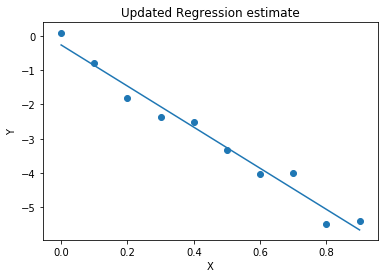

-> Iter: 250, Update w0: -6.014, Update w1: -0.258, MSE: 0.08389


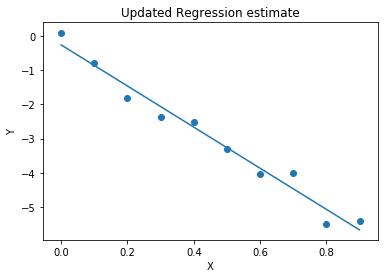

-> Final model: w0: -6.015, w1: -0.257, MSE: 0.08389


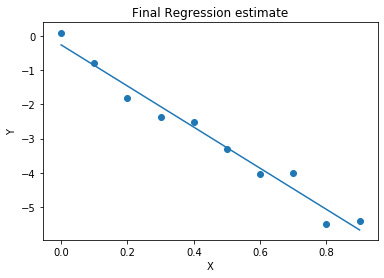

In [92]:
# Initialise starting parameters w0 and w1
w0 = np.random.rand()
w1 = np.random.rand()

# Select training hyper-parameters: number of iterations and learning rate control parameter alpha
n_iterations = 300
alpha = 0.5

# Plot initial linear regression estimate
plt.figure()
plt.scatter(x, y)
plt.plot(x,w0 * x + w1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Initial regression estimate')
plt.show(block=False)

# Iterate
for i_iteration in range(0, n_iterations):
    
    # Predicted Y values of X with current w0 and w1 parameters
    y_fit = w0 * x + w1
    
    # Calculate difference between observed data and model's prediction
    y_diff = y_fit - y 
    
    # Calculate partial derivative of mean squares error with respect to w0
    pd_mse_w0 = np.sum(y_diff * x) / y.shape[0]
    
    # Calculate partial derivative of mean squares error with respect to w1
    pd_mse_w1 = np.sum(y_diff) / y.shape[0]
    
    # Update w0
    w0 = w0 - alpha * pd_mse_w0  
    
    # Update w1
    w1 = w1 - alpha * pd_mse_w1
    
    # Calculate MSE 
    mse = np.mean(((w0 * x + w1) - y) ** 2)
    # Print progress
    if (i_iteration % 50) == 0:
        print(f'-> Iter: {i_iteration}, Update w0: {w0:.3f}, Update w1: {w1:.3f}, MSE: {mse:.5f}')
        plt.scatter(x, y)
        plt.plot(x, w0 * x + w1)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Updated Regression estimate')
        plt.show(block=False)
        
print(f'-> Final model: w0: {w0:.3f}, w1: {w1:.3f}, MSE: {mse:.5f}')
plt.scatter(x, y)
plt.plot(x, w0 * x + w1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Regression estimate')
plt.show(block=False)

Predicted y value for 0.66 is -4.227071253653524


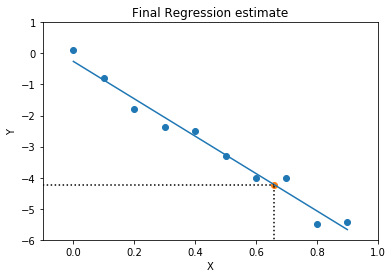

In [91]:
test_x = 0.66
predicted_y = w0 * test_x + w1

print(f'Predicted y value for {test_x} is {predicted_y}')

plt.figure()
plt.scatter(x, y)
plt.plot(x, w0 * x + w1)
plt.scatter(test_x, predicted_y)
plt.plot((test_x, test_x), (-10, predicted_y), 'k:')
plt.plot((-1, test_x), (predicted_y, predicted_y), 'k:')
plt.xlim(-0.1,1)
plt.ylim(-6,1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Regression estimate')
plt.show(block=False)


## Linear Discriminant Analysis
Here we will load the example data from wineData.npy and wineLabels.npy and perform Principal Component Analysis on the data in order to reduce the feature dimensionality of the problem. We first divide the dataset into a training and testing set and perform the LDA projection on each set. The following subtasks are:
1. Load the data and labels.
2. Plot the original dataset.
3. Divide the dataset into a testing and training set. 
4. Plot the two sets on the same figure. 
5. Calculate the mean of each class in order to compute the within- and between-class scatter matrices.
6. Calculate and plot the percentage variance explained by each discriminant. 
7. Select a number of discriminants to keep based on the explained variance.
8. Project the data into the linear discriminant space.
9. Plot the data in the linear discriminant space.


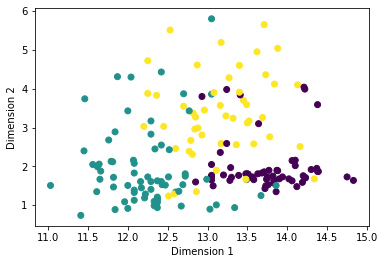

In [49]:
# Load in the Wine dataset
x = np.load('wineData.npy')
y = np.load('wineLabels.npy')

# Plot two feature dimensions against eachother
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show(block=False)

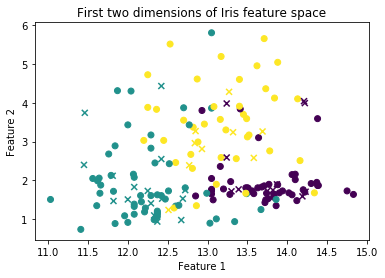

In [53]:
# Select data points to divide into a training and testing set
n = x.shape[0]
split_point = int(n * 0.8)

# Divide the dataset into the two sets
train_data = x[:split_point, :] 
train_labels = y[:split_point] 
test_data = x[split_point:, :] 
test_labels = y[split_point:] 

# Plot the training samples, then plot the testing samples over the top with different marker shapes
plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('First two dimensions of Iris feature space')
plt.show()

In [57]:
# Define some basic data properties
n_class = np.max(train_labels) + 1
n_samples = train_data.shape[0]
n_features = train_data.shape[1]

# Calculate class sample counts
n_samples_in_class = np.zeros(n_class)
for i_class in range(n_class):
    n_samples_in_class[i_class] = train_data[train_labels==i_class, :].shape[0]

# Calculate class means
mu = np.mean(train_data, axis=0)
mu_class = np.zeros((n_class, n_features))
for i_class in range(n_class):
    mu_class[i_class, :] = np.mean(train_data[train_labels==i_class, :], axis=0)

# Calculate within-class scatter matrix
Sw = np.zeros((n_features, n_features))
for i_class in range(n_class):
    Si = np.zeros((n_features, n_features))
    cluster_data = train_data[train_labels==i_class, :]
    for i_data in range(cluster_data.shape[0]):
        centred_datapoint = cluster_data[i_data:i_data+1, :] - mu_class[i_class:i_class+1, :]
        Si += centred_datapoint.T @ centred_datapoint
    Sw += Si
    
# Calculate between-class scatter matrix
mu_class_mu = np.zeros((n_class, n_features))
for i_class in range(n_class):
    mu_class_mu[i_class, :] = mu_class[i_class, :] - mu
    
Sb = np.zeros((n_features, n_features))
for i_class in range(n_class):
    Sb += n_samples_in_class[i_class] * mu_class_mu[i_class:i_class+1, :].T @ mu_class_mu[i_class:i_class+1, :]

# Solve eigen decomposition for inv(Sw)Sb
eigvalues, eigvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)

# Eig doesn't guarantee a sorted output, so sort the eigenvectors based on the eigenvalues
print(eigvalues)
sorted_indices = np.argsort(eigvalues)[::-1]
eigvalues = eigvalues[sorted_indices]
eigvectors = eigvectors[:, sorted_indices]

[ 1.02381059e+01+0.00000000e+00j  3.96243052e+00+0.00000000e+00j
  7.46417019e-16+4.43041849e-16j  7.46417019e-16-4.43041849e-16j
 -8.48574534e-16+0.00000000e+00j -5.06100023e-16+4.71313751e-16j
 -5.06100023e-16-4.71313751e-16j  6.80162029e-16+0.00000000e+00j
 -2.84152020e-16+5.38801170e-17j -2.84152020e-16-5.38801170e-17j
 -1.05747002e-17+0.00000000e+00j  1.78470547e-16+0.00000000e+00j
  1.20978349e-16+0.00000000e+00j]


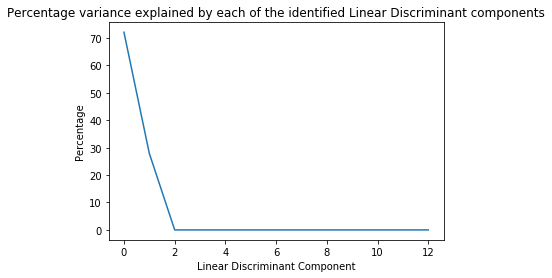

In [58]:
# Calculate the variance explained by each of the principal components
percentage_variance_explained = eigvalues / sum(eigvalues) * 100

# Plot the percentage variance explained by each of the linear discriminant spaces
plt.figure()
plt.plot(percentage_variance_explained)
plt.xlabel('Linear Discriminant Component')
plt.ylabel('Percentage')
plt.title('Percentage variance explained by each of the identified Linear Discriminant components')
plt.show(block=False)

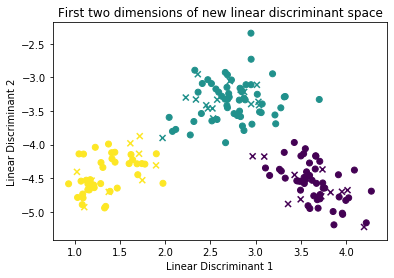

In [61]:
# Select the feature channels we want to keep based on the variance explained by the Linear Discriminant Analysis
n_dimensions = 2
projection_matrix = eigvectors[:, :n_dimensions].real 

# Project observed data into the new subspace
projected_train_data = train_data @ projection_matrix
projected_test_data = test_data @ projection_matrix

# Plot data on new subspace
plt.figure()
plt.scatter(projected_train_data[:, 0], projected_train_data[:, 1], c=train_labels, marker='o')
plt.scatter(projected_test_data[:, 0], projected_test_data[:, 1], c=test_labels, marker='x')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('First two dimensions of new linear discriminant space')
plt.show(block=False)